In [1]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load CSV dataset and start cleaning the data 
heartdisease_data = pd.read_csv("heart.csv")

In [3]:
heartdisease_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heartdisease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Describe method returns basic information/attributes for each column; basic stats about the dataset 
heartdisease_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Returns two dimensional array 
heartdisease_data.values

array([[40, 'M', 'ATA', ..., 0.0, 'Up', 0],
       [49, 'F', 'NAP', ..., 1.0, 'Flat', 1],
       [37, 'M', 'ATA', ..., 0.0, 'Up', 0],
       ...,
       [57, 'M', 'ASY', ..., 1.2, 'Flat', 1],
       [57, 'F', 'ATA', ..., 0.0, 'Flat', 1],
       [38, 'M', 'NAP', ..., 0.0, 'Up', 0]], dtype=object)

In [7]:
# Idenitfy null values (False = not null, True = null)/ used youtube video to obtain this information 
heartdisease_data.isnull().head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
heartdisease_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# notnull is the opposite of the isnull function 
heartdisease_data.notnull().head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True


In [10]:
# Obtain number of rows and columns / two dimensional array 
heartdisease_data.shape

(918, 12)

In [11]:
heartdisease_data.dropna(how='any').shape

(918, 12)

In [12]:
heartdisease_data.dropna(how='all').shape

(918, 12)

In [13]:
heartdisease_data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [14]:
# Learning to identify null values in a subset
heartdisease_data.dropna(subset=['ChestPainType', 'RestingBP'], how='all').shape

(918, 12)

In [15]:
pd.DataFrame(heartdisease_data["Sex"].value_counts())

,Sex
M,725
F,193


In [16]:
pd.DataFrame(heartdisease_data.Sex[heartdisease_data.HeartDisease ==1].value_counts())

,Sex
M,458
F,50


In [17]:
pd.crosstab(heartdisease_data.HeartDisease, heartdisease_data.Sex)

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


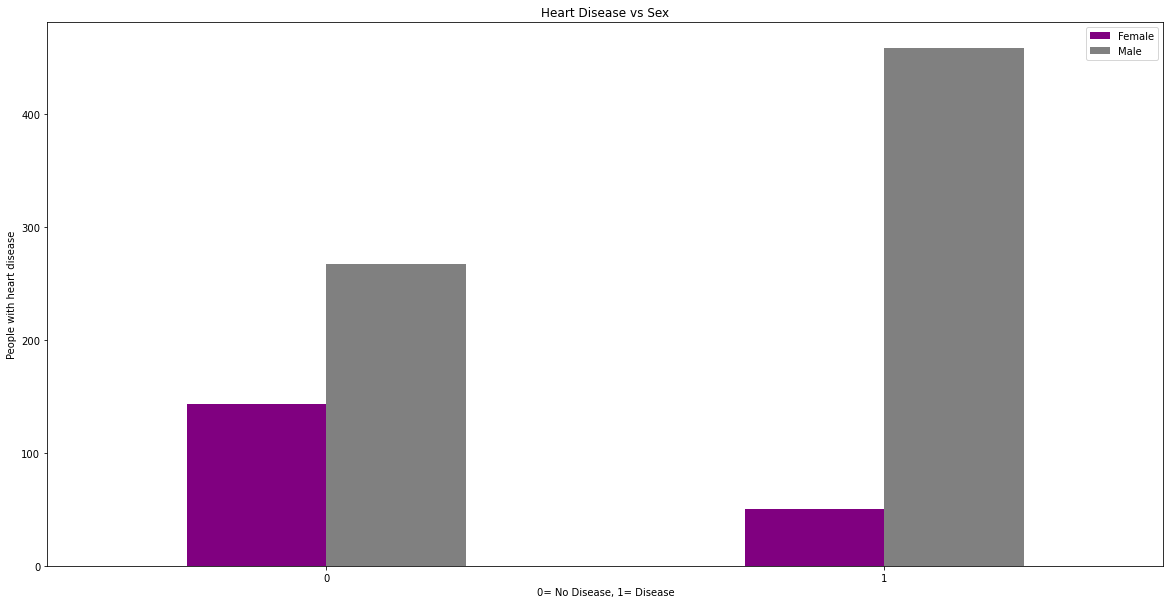

In [18]:
pd.crosstab(heartdisease_data.HeartDisease, heartdisease_data.Sex).plot(kind='bar',figsize=(20,10),color=["purple","gray"])
plt.title('Heart Disease vs Sex')
plt.xlabel("0= No Disease, 1= Disease")
plt.ylabel('People with heart disease')
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

Text(0.5, 1.0, 'Sex and Heart Disease')

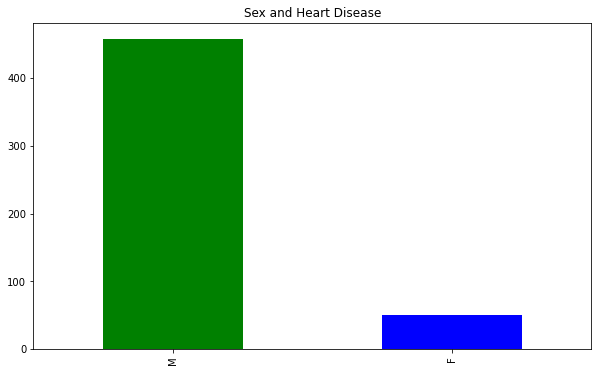

In [20]:
heartdisease_data.Sex[heartdisease_data.HeartDisease==1].value_counts().plot(kind='bar', figsize=(10, 6), color =['green', 'blue'])
plt.title('Sex and Heart Disease')

In [22]:
pd.DataFrame(heartdisease_data["ChestPainType"].value_counts())

,ChestPainType
ASY,496
NAP,203
ATA,173
TA,46


In [23]:
pd.DataFrame(heartdisease_data["RestingECG"].value_counts())

,RestingECG
Normal,552
LVH,188
ST,178


In [24]:
heartdisease_data[heartdisease_data["RestingBP"]>=180]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1


In [25]:
heartdisease_data[heartdisease_data["Cholesterol"]>=240]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0
15,54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0
...,...,...,...,...,...,...,...,...,...,...,...,...
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
